In [1]:
%config Completer.use_jedi = False

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [3]:
class SIS:
    def __init__(self, G, beta=0.1, gamma=0.1):
        """
        G - graph
        beta - probability of being infected
        gamma - probability of recovery""" 
        self.beta = beta
        self.gamma = gamma
        self.G = G
        self.reset()
    def reset(self) -> None: 
        self.is_infected ={k: False for k in self.G.nodes} #at the beggining nobody is infected
        self.is_infected[3] = True # except for one unlucky person 
        self.t=0
    def iterate(self) -> None:
        if all(self.is_infected.values()) or not any(self.is_infected.values()):
            return self.reset()
        will_be_infected = {} # I set a new dict, because I was wondering whether I should start from infected or healthy people
        for person in self.G.nodes:
            if not self.is_infected[person]:
                # we flip a coin for each infected neighbor, and we check if any of the coin resolved in a infection
                will_be_infected[person] = any(np.random.uniform() < self.beta
                                               for neighbors in self.G.neighbors(person) if self.is_infected[neighbors])
            else:
                will_be_infected[person] =  np.random.uniform() > self.gamma
        self.is_infected = will_be_infected
        self.t+=1

In [4]:
%matplotlib notebook

# 11.1

<IPython.core.display.Javascript object>


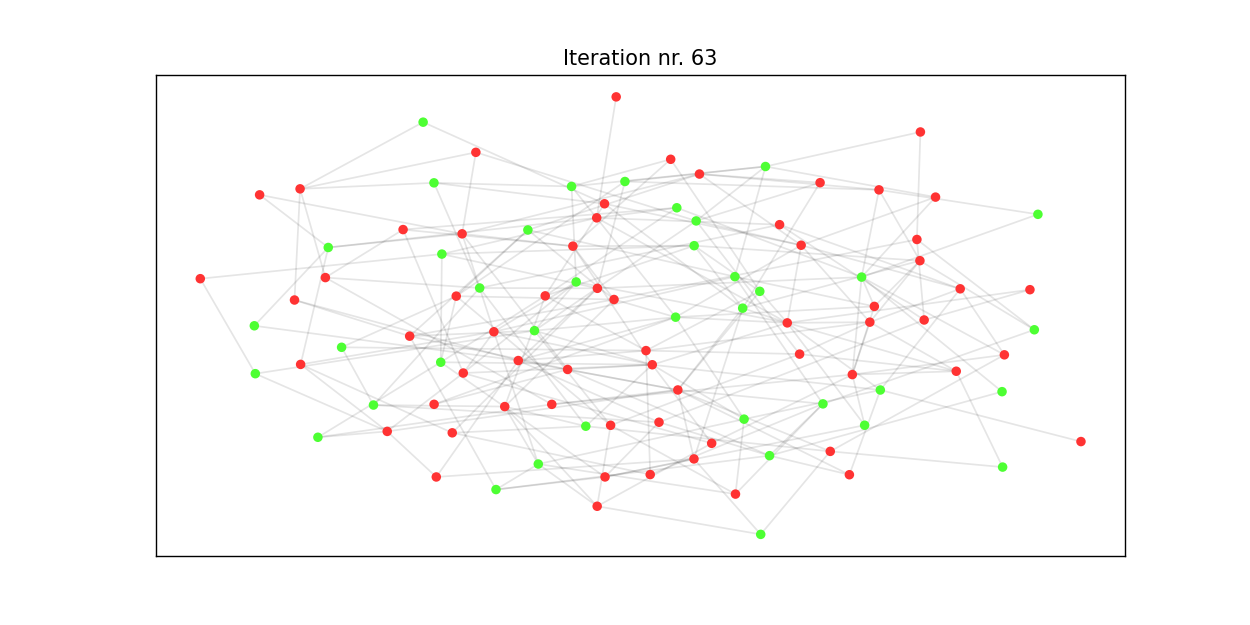

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sis = SIS(nx.generators.erdos_renyi_graph(n=100, p=0.05), beta=0.2, gamma=0.3)
pos = nx.kamada_kawai_layout(sis.G)
graph_args = {"pos": pos, "ax": ax, "node_size": 20, "with_labels": False, "edge_color": (0, 0, 0, 0.1)}

def init():
    ax.clear()
    sis.reset()
    return ax
    

def update(frame): 
    sis.iterate()
    ax.clear()
    ax.set_title(f"Iteration nr. {sis.t}")
    nx.draw_networkx(sis.G,  
                     node_color=[(1, 0.2, 0.2) if sis.is_infected[node] else (0.3, 1, 0.2) for node in sis.G.nodes()],
                     **graph_args)
    return ax

ani = FuncAnimation(fig, update, frames=range(100), interval=1000, init_func=init)

In [4]:
p = 0.05
N = 50
def avg_infected_ratio(beta, gamma, p=p, N=N, T=100) -> float:
    model = SIS(nx.generators.erdos_renyi_graph(N, p), beta, gamma)
    sum_ = 0
    for _ in range(T):
        model.iterate()
        sum_+=sum(model.is_infected.values())
    return sum_/N/T

M = 10
df = pd.DataFrame([{'beta': b, 
                    'gamma': g,  
                    'beta/gamma': (b/g),
                    'avg(i(t))': avg_infected_ratio(b, g)} for b in np.log(np.linspace(1, np.e, M)) 
                                                           for g in np.log(np.linspace(1, np.e, M))
                                                           for _ in range(10)])
df = df.groupby('beta/gamma').mean().reset_index()
df

<ipython-input-4-142d81026d02>:14: RuntimeWarning: invalid value encountered in double_scalars
  'beta/gamma': (b/g),
<ipython-input-4-142d81026d02>:14: RuntimeWarning: divide by zero encountered in double_scalars
  'beta/gamma': (b/g),


,beta/gamma,beta,gamma,avg(i(t))
0,0.000000,0.000000,0.636417,0.012529
1,0.174726,0.174726,1.000000,0.013740
2,0.188450,0.174726,0.927176,0.015560
3,0.205892,0.174726,0.848629,0.016640
4,0.228884,0.174726,0.763383,0.020380
...,...,...,...,...
70,4.369019,0.763383,0.174726,0.731580
71,4.856905,0.848629,0.174726,0.654660
72,5.306448,0.927176,0.174726,0.673000
73,5.723237,1.000000,0.174726,0.729780


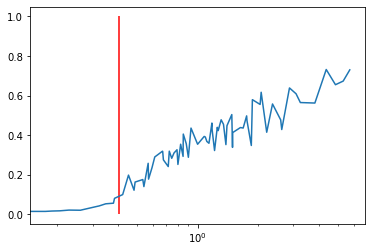

In [5]:
plt.plot(df['beta/gamma'], df['avg(i(t))'])
plt.vlines(1/(p*(N-1)), 0, 1, "red") # emidemy threshold - 1/<k>*s(0) = 1/p*S(0)
plt.xscale('log')

# 11.2

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sis = SIS(nx.generators.barabasi_albert_graph(n=100, m=2), beta=0.2, gamma=0.4)
pos = nx.kamada_kawai_layout(sis.G)
graph_args = {"pos": pos, "ax": ax, "node_size": 20, "with_labels": False, "edge_color": (0, 0, 0, 0.1)}

def init():
    ax.clear()
    sis.reset()
    return ax
    

def update(frame): 
    sis.iterate()
    ax.clear()
    ax.set_title(f"Iteration nr. {sis.t}")
    nx.draw_networkx(sis.G,  
                     node_color=[(1, 0.2, 0.2) if sis.is_infected[node] else (0.3, 1, 0.2) for node in sis.G.nodes()],
                     **graph_args)
    return ax

ani = FuncAnimation(fig, update, frames=range(100), interval=1000, init_func=init)

In [ ]:
m = 5
N = 50
def avg_infected_ratio(beta, gamma, m=m, N=N, T=50) -> float:
    model = SIS(nx.generators.barabasi_albert_graph(N, m), beta, gamma)
    sum_ = 0
    for _ in range(T):
        model.iterate()
        sum_+=sum(model.is_infected.values())
    return sum_/N/T

M = 10
df = pd.DataFrame([{'beta': b, 
                    'gamma': g,  
                    'beta/gamma': (b/g),
                    'avg(i(t))': avg_infected_ratio(b, g)} for b in np.log(np.linspace(1, np.e, M)) 
                                                           for g in np.log(np.linspace(1, np.e, M))
                                                           for _ in range(10)])
df = df.groupby('beta/gamma').mean().reset_index()
df

<ipython-input-7-95b9b661f79c>:14: RuntimeWarning: invalid value encountered in double_scalars
  'beta/gamma': (b/g),
<ipython-input-7-95b9b661f79c>:14: RuntimeWarning: divide by zero encountered in double_scalars
  'beta/gamma': (b/g),


In [ ]:
plt.plot(df['beta/gamma'], df['avg(i(t))'])
k_avg = 2*m
plt.vlines(1/(k_avg*(N-1)/N), 0, 1, "red") # epidemy threshold - 1/<k>*s(0) = 1/m*S(0)/N
plt.xscale('log')